# Statistics on the Dataset

This notepad should be used to gain insights about the dataset

In [1]:
%load_ext autoreload
%autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import data_handling

In [2]:
%autoreload
data = data_handling.read_all_user_data()
data.head(5)

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1441303601,0.985904,0.004284,-0.002535,0.006837,0.983566,0.986022,0.988217,2.037017,6.684602,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2
1,1441303711,0.986237,0.005683,-0.002629,0.012895,0.983817,0.985961,0.988318,1.297009,6.684595,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2
2,1441303771,0.985829,0.003428,0.005813,0.009183,0.984117,0.985649,0.987221,1.419417,6.684606,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2
3,1441303832,0.992570,0.040706,0.052173,0.087916,0.984075,0.989235,0.998642,1.452253,6.683790,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2
4,1441303909,0.998947,0.018689,-0.003638,0.048253,0.992785,0.998651,1.004727,1.059025,6.684436,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2


Gather for each Label the amount of 1, 0 and NaN

In [3]:
labels = data.iloc[:, 226:-1]
labels.rename(columns=lambda x: x[6:], inplace=True)
results = pd.DataFrame([],columns=['0', '1', 'NaN'])
for column in labels.columns[:]:
    values = labels[column]
    zeros = 0
    ones = 0
    nans = 0
    for value in values.values:
        if pd.isna(value): nans += 1
        elif value < 0.1: zeros += 1
        elif value > 0.1: ones += 1
    #column = column[6:]
    temp = pd.DataFrame([[zeros, ones, nans]], index=[column],  columns=['0', '1', 'NaN'])
    results = pd.concat([results, temp])
    

Use this to sort he counts by '0', '1' or 'NaN'. Rerun if changed.

In [4]:
results.sort_values(by=['0'], inplace=False)

,0,1,NaN
OR_indoors,12114,184692,180540
SINGING,24466,651,352229
AT_A_BAR,32669,551,344126
AT_THE_GYM,43242,1151,332953
LAB_WORK,45547,3848,327951
PHONE_ON_TABLE,47386,115037,214923
STROLLING,52955,806,323585
AT_A_PARTY,53093,1470,322783
LOC_beach,57059,585,319702
DRINKING__ALCOHOL_,69327,1456,306563


#Correlations

<module 'matplotlib.pyplot' from '/home/tp/Workspace/mu_practical_work/src/venv/lib/python3.6/site-packages/matplotlib/pyplot.py'>

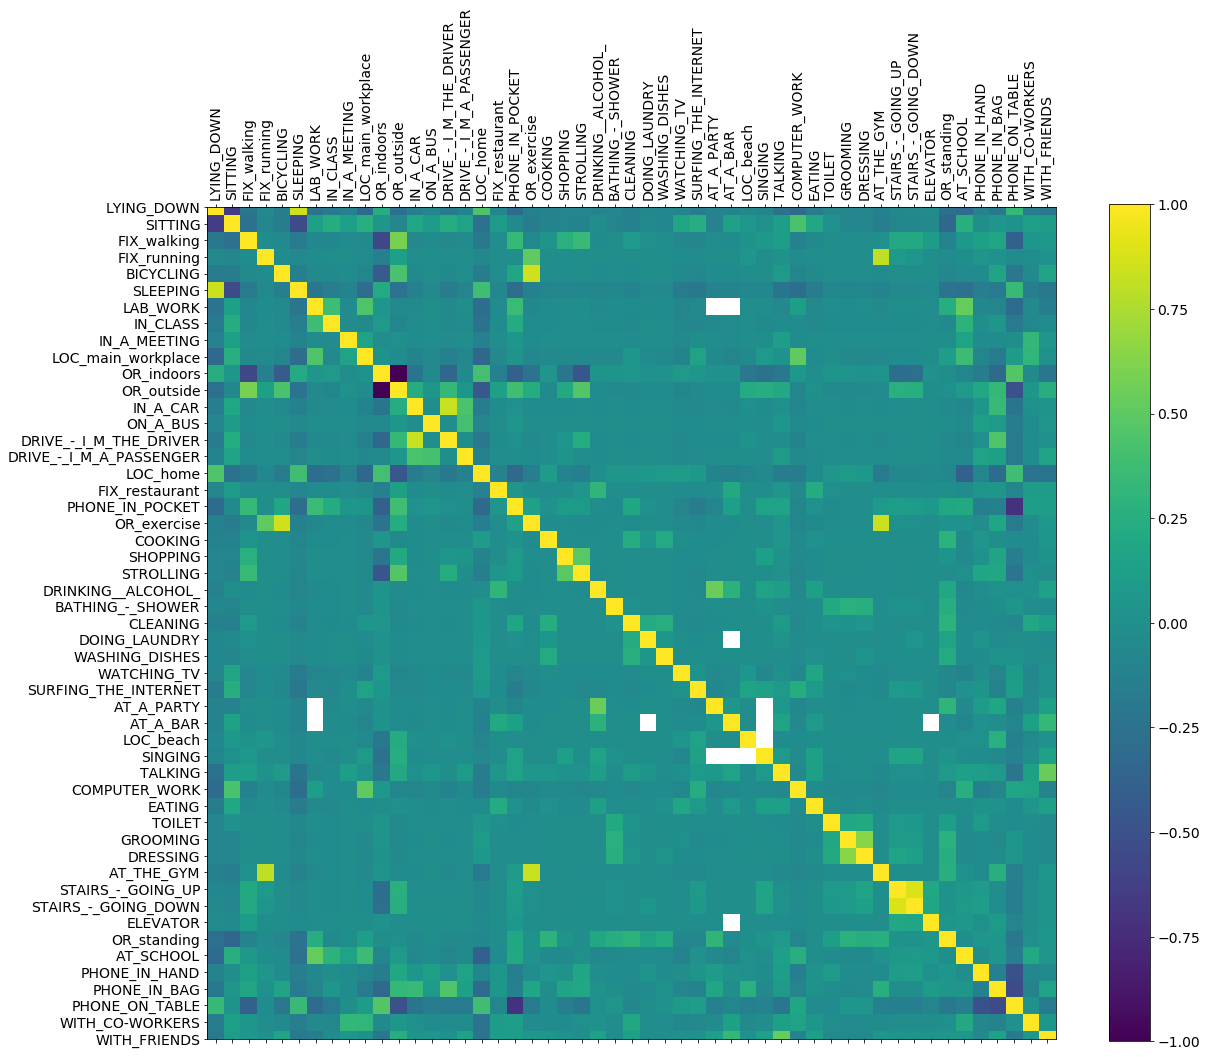

In [7]:
corr = labels.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(labels.shape[1]), labels.columns, fontsize=14, rotation=90)
plt.yticks(range(labels.shape[1]), labels.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt

# Histogram for percent of labels with NaN as value
(needs some time for calculation; Prevent rerunning if possible)

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


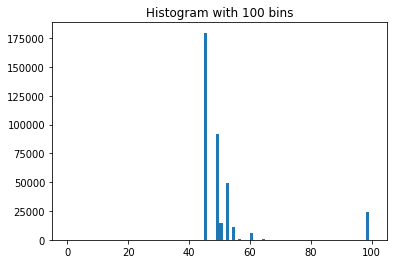

In [49]:
hist_result = []
BINS = 100
for row in labels.index:
    #print("row: {}".format(row))
    count = 0
    for column in range(len(labels.columns)):
        #print("column: {}".format(column))
        #print(labels.iat[row, column])
        if pd.isna(labels.iat[row, column]): count += 1
    hist_result.append(count/51 * 100)
    if row % round(len(labels.index)/50) == 0:
        print("|", end='')
print("")
plt.hist(hist_result, bins=BINS, range=(0, 100))
plt.title("Histogram with {} bins".format(BINS))
plt.show() 
